# Popular Data Science Questions

In this project, we will explore some of the most asked questions on [Data Science Stack Exchange](https://datascience.stackexchange.com/). To access the data, we will use the [Stack Exchange Data Explorer](https://data.stackexchange.com/datascience/query/new). This is a convinient public database Stack Exhange provides for each of its websites. 

After exploring the data model, the ```Posts``` table has the information that we will need. 

## Data Dictionary

- ```Id```: An identification number for the post.
- ```PostTypeId```: An identification number for the type of post
- ```CreationDate```: The date and time of creation of the post.
- ```Score```: The post's score.
- ```ViewCount```: How many times the post was viewed.
- ```Tags```: What tags were used.
- ```AnswerCount```: How many answers the question got (only applicable to question posts).
- ```FavoriteCount```: How many times the question was favored (only applicable to question posts)

Since we only want posts that are questions, we select only ```PostTypeId = 1```


## Query the Data
The following query gets us the data we want:

```
SELECT Id, PostTypeId, CreationDate, Score,
  ViewCount, Tags, AnswerCount, FavoriteCount 
  FROM Posts
  WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;
```


## Import libraries and dataframe. Explore the dataframe

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=14
    )


%matplotlib inline

In [69]:
df = pd.read_csv('2019_questions.csv')

In [70]:
df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8839 non-null   int64  
 1   CreationDate   8839 non-null   object 
 2   Score          8839 non-null   int64  
 3   ViewCount      8839 non-null   int64  
 4   Tags           8839 non-null   object 
 5   AnswerCount    8839 non-null   int64  
 6   FavoriteCount  1407 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


There are 8839 rows of data. The only column with missing data is ```FavoriteCount```. A missing value in this column probably means the post was not listed as a favorite for anybody, so we can replace the NaNs with 0. 



In [72]:
df['FavoriteCount'].unique()

array([nan,  1.,  2.,  3.,  0., 11.,  4.,  5.,  7.,  6., 16.,  8.])

## Cleaning the Data

First, fill the missing values from ```FavoriteCount``` with 0s and convert to Int datatype.



In [73]:
df.fillna(value={'FavoriteCount':0},inplace=True)
df['FavoriteCount'] = df['FavoriteCount'].astype(int)

In [74]:
df['FavoriteCount'].dtype

dtype('int64')

Now, let's set the types of each column according to what will make sense when we want to use the column for analysis.

In particular, we will change ```CreationDate``` to datetime65[ns]. 

In [75]:
df['CreationDate'] = pd.to_datetime(df['CreationDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  8839 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


And finally, let us clean the ```Tags``` columns so that each tag is a string comprised of possibly multiple tags, each separated by commas.

In [76]:
df['Tags'] = df['Tags'].str.replace("^<|>$", "").str.split("><")

<ipython-input-76-6dd37623c225>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tags'] = df['Tags'].str.replace("^<|>$", "").str.split("><")


In [77]:
df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0


In [78]:
# check that we have what we want

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  8839 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


## Most Used and Most Viewed

We now focus on determining the most popular tags. We'll do so by considering two different popularity proxies: for each tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.



In [79]:
# count how many times each tag was used

tag_count = dict()

for x in df['Tags']:
    for tag in x:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

In [80]:
# convert tag_count to dataframe
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)

tag_count.head()

,Count
machine-learning,2693
data-mining,217
regression,347
linear-regression,175
regularization,50


In [81]:
most_popular = tag_count.sort_values(by='Count').tail(20)


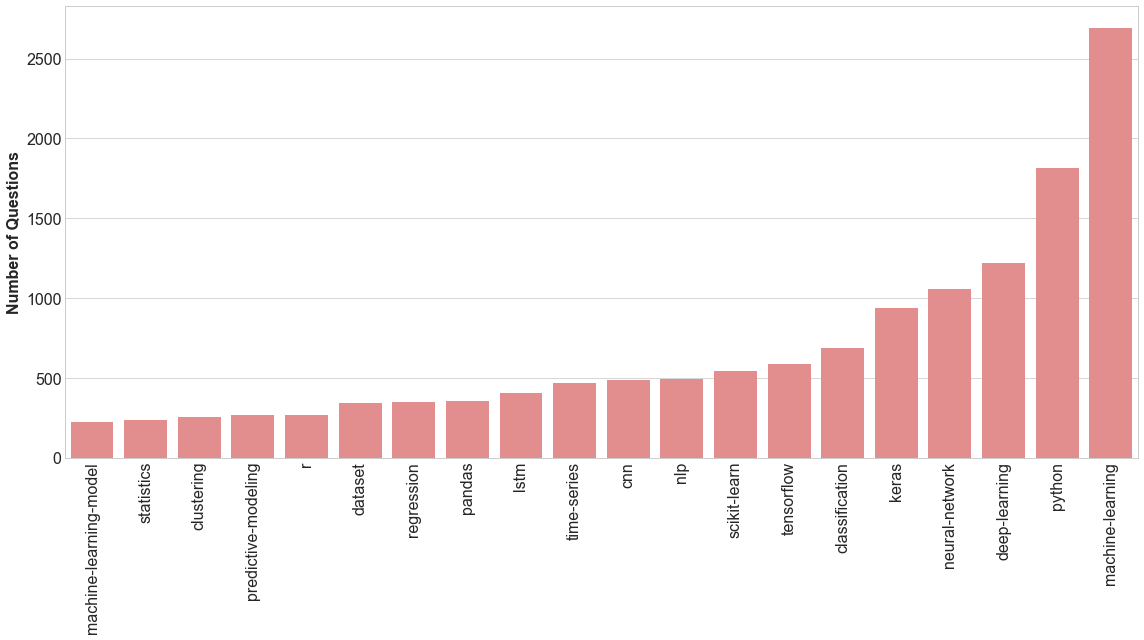

In [82]:
plt.figure(figsize=(16,9))

sns.barplot(x=most_popular.index,y='Count',data=most_popular,
           color='lightcoral')
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16)
plt.ylabel('Number of Questions',fontsize=16)

plt.show()

In [83]:
tag_view_count = dict()

for index, row in df.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)




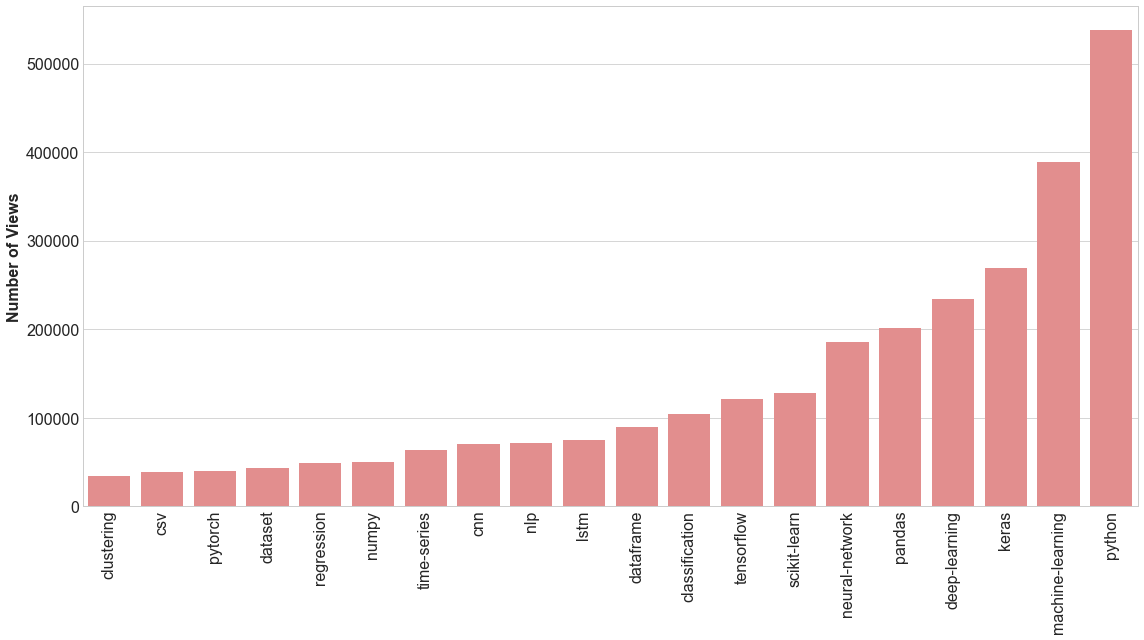

In [84]:
plt.figure(figsize=(16,9))
sns.barplot(x=most_viewed.index,y='ViewCount',data=most_viewed,
           color='lightcoral')
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16)
plt.ylabel('Number of Views',fontsize=16)

plt.show()

## Relations Between Tags

In [85]:
# let's see which tags are in most_popular but not in most_viwed

in_popular = pd.merge(most_popular, most_viewed, how="left", left_index=True, right_index=True)

in_popular.head(40)
#in_popular.size


,Count,ViewCount
machine-learning-model,224,NaN
statistics,234,NaN
clustering,257,33928.0
predictive-modeling,265,NaN
r,268,NaN
dataset,340,43151.0
regression,347,49451.0
pandas,354,201787.0
lstm,402,74458.0
time-series,466,64134.0


In [86]:
# let's see which tags are in most_viewed but not in most_popular

in_viewed = pd.merge(most_viewed, most_popular, how="left", left_index=True, right_index=True)


In [87]:
in_viewed.head(40)

,ViewCount,Count
clustering,33928,257.0
csv,38654,NaN
pytorch,40240,NaN
dataset,43151,340.0
regression,49451,347.0
numpy,49767,NaN
time-series,64134,466.0
cnn,70349,489.0
nlp,71382,493.0
lstm,74458,402.0


The tags present in ```most_popular``` and not present in ```most_viewed``` are
- machine-learning-model
- statistics
- predictive-modeling
- r

The tage present in ```most_viewed``` and not present in ```most_popular``` are
- csv
- pytorch
- dataframe


## Is Deep Learning a Fad?

We saw above that deep learning appeared on both ```most_viewed``` and ```most_popular```. We will spend some time investigating how interest in deep learning has changed over time. This will help us understand whether or not deep learning is a fad. 

We will start by important a dataset that contains all questions asked on Data Science Stack Exchange since 2014. 

In [88]:
all_questions = pd.read_csv('all_questions.csv')
all_questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [89]:
all_questions.tail()

,Id,CreationDate,Tags
21571,36971,2018-08-15 14:19:01,<statistics><data>
21572,36974,2018-08-15 14:40:27,<machine-learning><neural-network><classifier>
21573,36975,2018-08-15 14:53:43,<machine-learning><classification>
21574,36979,2018-08-14 19:31:43,<tensorflow><python>
21575,36985,2018-08-15 17:01:29,<python><deep-learning><tensorflow>


In [90]:
# change the Tags column to a list, as before

all_questions['Tags'] = all_questions['Tags'].str.replace("^<|>$", "").str.split("><")

<ipython-input-90-e20fe8a25c35>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  all_questions['Tags'] = all_questions['Tags'].str.replace("^<|>$", "").str.split("><")


In [91]:
all_questions['CreationDate'] = pd.to_datetime(all_questions['CreationDate'])
all_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            21576 non-null  int64         
 1   CreationDate  21576 non-null  datetime64[ns]
 2   Tags          21576 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB


In [92]:
# find range of creation dates

print('Min: ', all_questions['CreationDate'].dt.year.min())
print('Max: ', all_questions['CreationDate'].dt.year.max())

Min:  2014
Max:  2020


In [93]:
# let's start by grouping by year


year_popularity = all_questions['CreationDate'].groupby(by=all_questions['CreationDate'].dt.year).size()


In [94]:
year_popularity.head()

CreationDate
2014     562
2015    1167
2016    2146
2017    2957
2018    5475
Name: CreationDate, dtype: int64

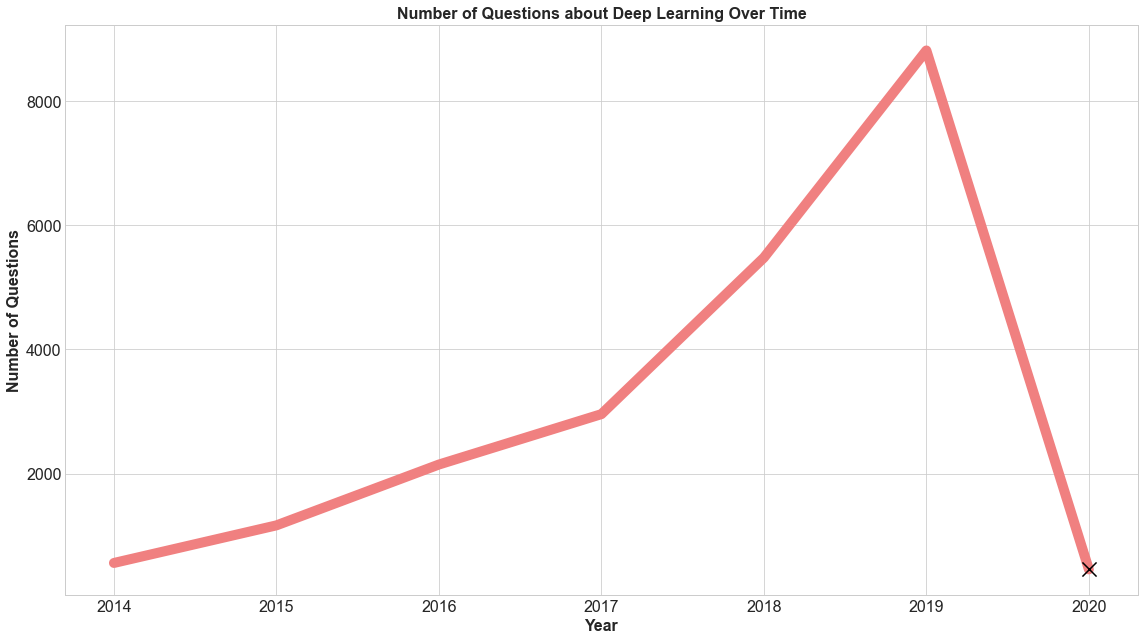

In [95]:
plt.figure(figsize=(16,9))
sns.lineplot(x=year_popularity.index,y=year_popularity,color='lightcoral',linewidth=10)
plt.scatter(2020,459,marker='x', s=200,c='black',zorder=3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number of Questions',fontsize=16)
plt.title('Number of Questions about Deep Learning Over Time', fontsize=16)

plt.show()

We see that since 2014 (the first year of this dataset), the number of questions related to deep learning increased quickly through 2019. However, there is a drop in 2020. Before we draw any conclusions from this, let's see how much of the year 2020 is included in the dataset.

In [96]:
# select only year 2020 questions
year2020 = all_questions[all_questions['CreationDate'].dt.year == 2020]

#year2020.shape

year2020_bymonth = year2020['CreationDate'].groupby(by=year2020['CreationDate'].dt.month).size()

year2020_bymonth.head(12)

CreationDate
1    459
Name: CreationDate, dtype: int64

So we see that that dataset ends in the first month of 2020. So we would not attribute the dip in the above graph to anything.